# Census Income Dataset Analysis in Python

### Description of Project Chosen

The census income dataset was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker. The data set has 32,561 rows and 15 columns. The data set has 15 attributes. It is a classic machine learning problem. This is basically a binary classification problem where a person is classified into the >50K income group or <=50K income group. I have used random forests model and decision tree model to tackle this problem. The dataset can be used to perform exploratory data analysis which can predict the income class of US population. In my project, the prediction task is to determine whether a person earns over 50K or less in a year.


## 1) Load the Libraries

In [1]:
# Load libaraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2) Load the Data

In [2]:
# Load data set by using pd.read_csv
data = pd.read_csv("data.csv")

In [3]:
# Dispaly the first 5 rows of the data set
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# Check the data types
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [5]:
# Check for null and/or missing values
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
# Check the data with unknow value "?"
data.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

The census income dataset has 32,561 rows and 15 columns. The data set has both numeric and categorical features. The variables: workclass, occupation and native.country have unknow values “?”. The dataset needs to be cleaned before analyzed.

## 3) Clean the Dataset

In [7]:
# Replace the "?" values with NaN, and check the first 5 rows
data = data.replace('?', np.NaN)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [8]:
# Clean the dataset by dropna()
data = data.dropna()
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [9]:
# Map the income labels numerically
data['income'] = data['income'].map({'<=50K':0, '>50K':1})

In [10]:
# Identify Numeric features
numeric_data = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

# Identify Categorical features
cat_data = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native']

## 4) Analyze and Visualize the Data

(4-1) Numeric data analysis

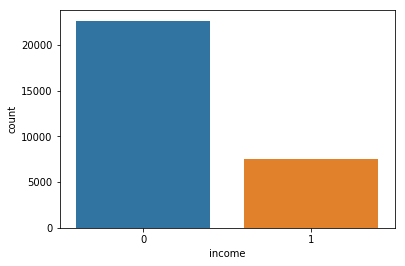

In [11]:
# Count of income >50K & <=50K
sns.countplot(data['income'],label="Count")
plt.show()

C:\Users\Dai\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


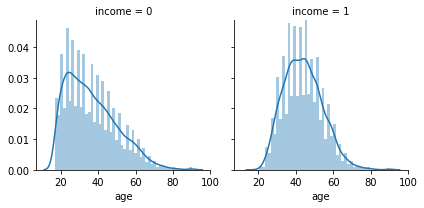

In [12]:
# Explore age vs income
g = sns.FacetGrid(data, col='income')
g = g.map(sns.distplot, "age")
plt.show()

### Inferences:
    
For Income <=50K, Age is positively skewed. More people in the 20s and 30s have income <= 50K;
For Income > 50K, Age is almost normally distributed.

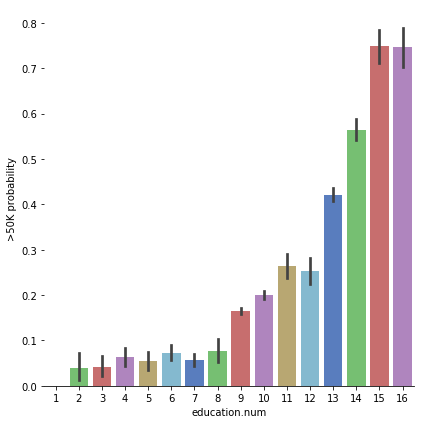

In [13]:
# Explore education.num vs income
g = sns.factorplot(x="education.num",y="income",data=data,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

### Inferences:
    
The people with the education levels in Prof-school, Doctorate and Masters have a higher probability in earning >50k.

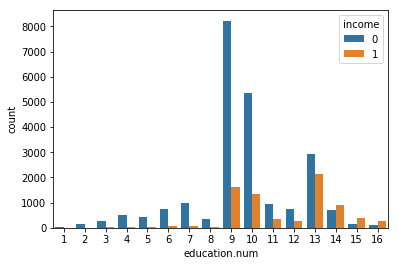

In [14]:
# Explore education.num vs income class
sns.countplot(data['education.num'], hue=data['income'])

### Inferences:

Most people with the education levels in HS-grad and Some-college earn <=50k;
For Income > 50K, the people with the education levels in Bachelors, HS-grad and Some-college account for the majority.

<Figure size 3600x1440 with 0 Axes>

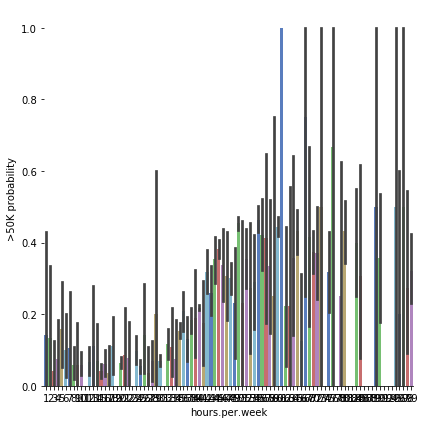

In [15]:
# Explore hours-perp-week vs income
plt.figure(figsize=(50,20))
g  = sns.factorplot(x="hours.per.week",y="income",data=data,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

(4-2) Categorical data analysis

In [16]:
# Fill missing category entries
data["workclass"] = data["workclass"].fillna("X")
data["occupation"] = data["occupation"].fillna("X")
data["native.country"] = data["native.country"].fillna("United-States")

In [17]:
# Confirm all missing data is handled
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

<Figure size 2880x2880 with 0 Axes>

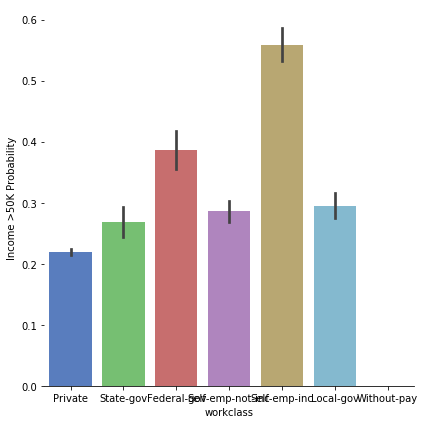

In [18]:
# Explore workclass vs income
plt.figure(figsize=(40,40))
g = sns.factorplot(x="workclass",y="income",data=data,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

### Inferences:
    
The workclass of Self-emp-inc has the higest probability to earn >50k.

<Figure size 2160x1440 with 0 Axes>

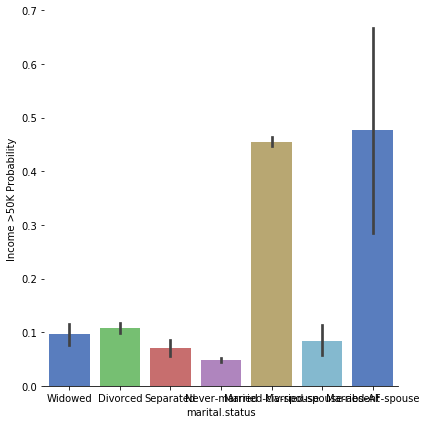

In [19]:
# Explore marital status vs income
plt.figure(figsize=(30,20))
g = sns.factorplot(x="marital.status",y="income",data=data,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

In [20]:
# Convert marital.status into 2 categories: Married and Single
data["marital.status"] = data["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
data["marital.status"] = data["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')

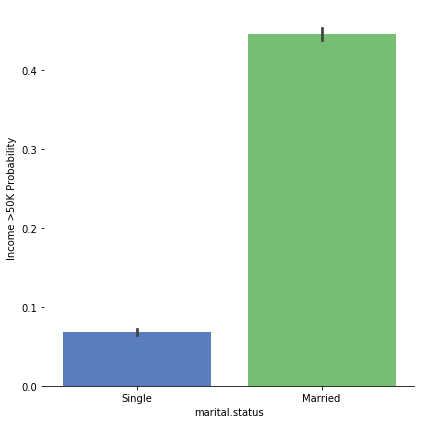

In [21]:
# Explore marital status (Married/Single vs income)
g = sns.factorplot(x="marital.status",y="income",data=data,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

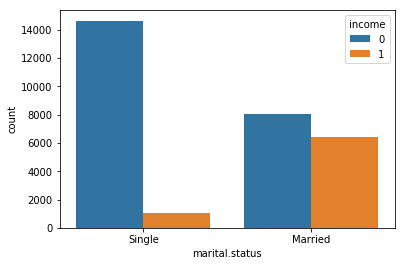

In [22]:
# Check how many single or married people have an income over or less 50k
sns.countplot(data['marital.status'], hue=data['income'])

### Inference:
    
Married people are more likely to earn more than 50K as income.

<Figure size 2160x1440 with 0 Axes>

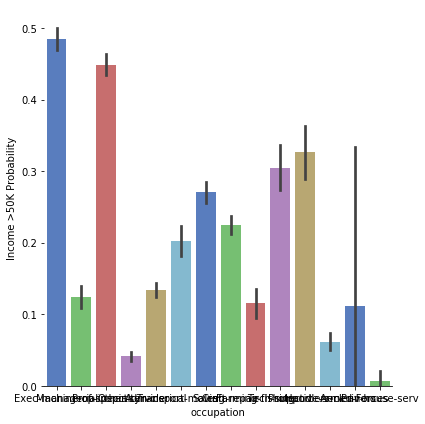

In [23]:
# Explore occupation vs Income
plt.figure(figsize=(30,20))
g = sns.factorplot(x="occupation",y="income",data=data,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

### Inference:
    
Occupation is an important factor affecting income. Exec-managerial has the highest probability to get the income >50k.

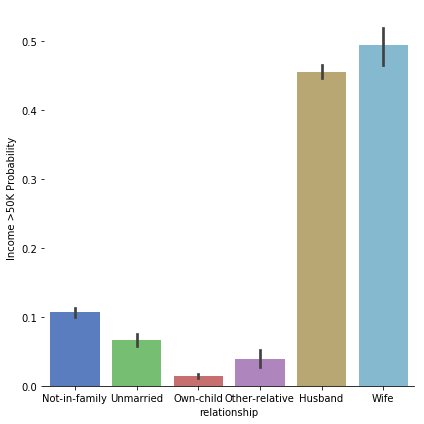

In [24]:
# Explore relationship vs income
g = sns.factorplot(x="relationship",y="income",data=data,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

### Inference:
    
The people in husband or wife relationships have a higher probability to get >50k income.

Text(0.5,1,'Relationships vs Income')

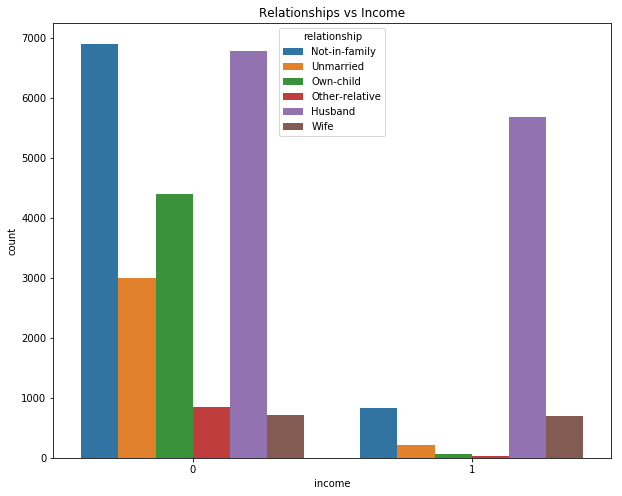

In [25]:
# Check the income level of different Relationships
plt.figure(figsize=(10,8))
ax = sns.countplot(data['income'], hue=data['relationship'])
ax.set_title('Relationships vs Income')

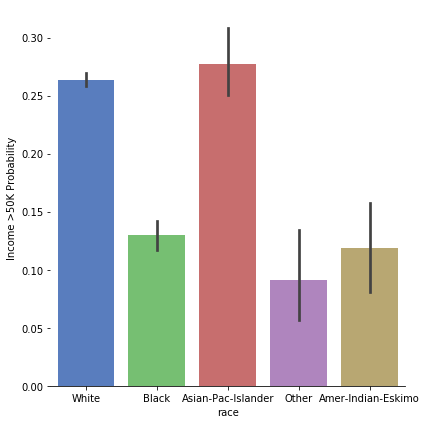

In [26]:
# Explore race vs income
g = sns.factorplot(x="race",y="income",data=data,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

Text(0.5,1,'Race vs Income')

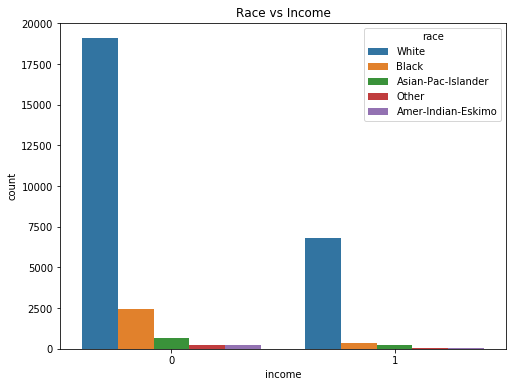

In [27]:
# check the income level of different races
plt.figure(figsize=(8,6))
ax = sns.countplot(data['income'], hue=data['race'])
ax.set_title('Race vs Income')

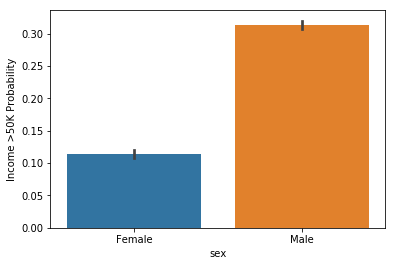

In [28]:
# Explore sex vs income
g = sns.barplot(x="sex",y="income",data=data)
g = g.set_ylabel("Income >50K Probability")
plt.show()

### Inference: 
    
Men are more likely to get more than 50K income. 

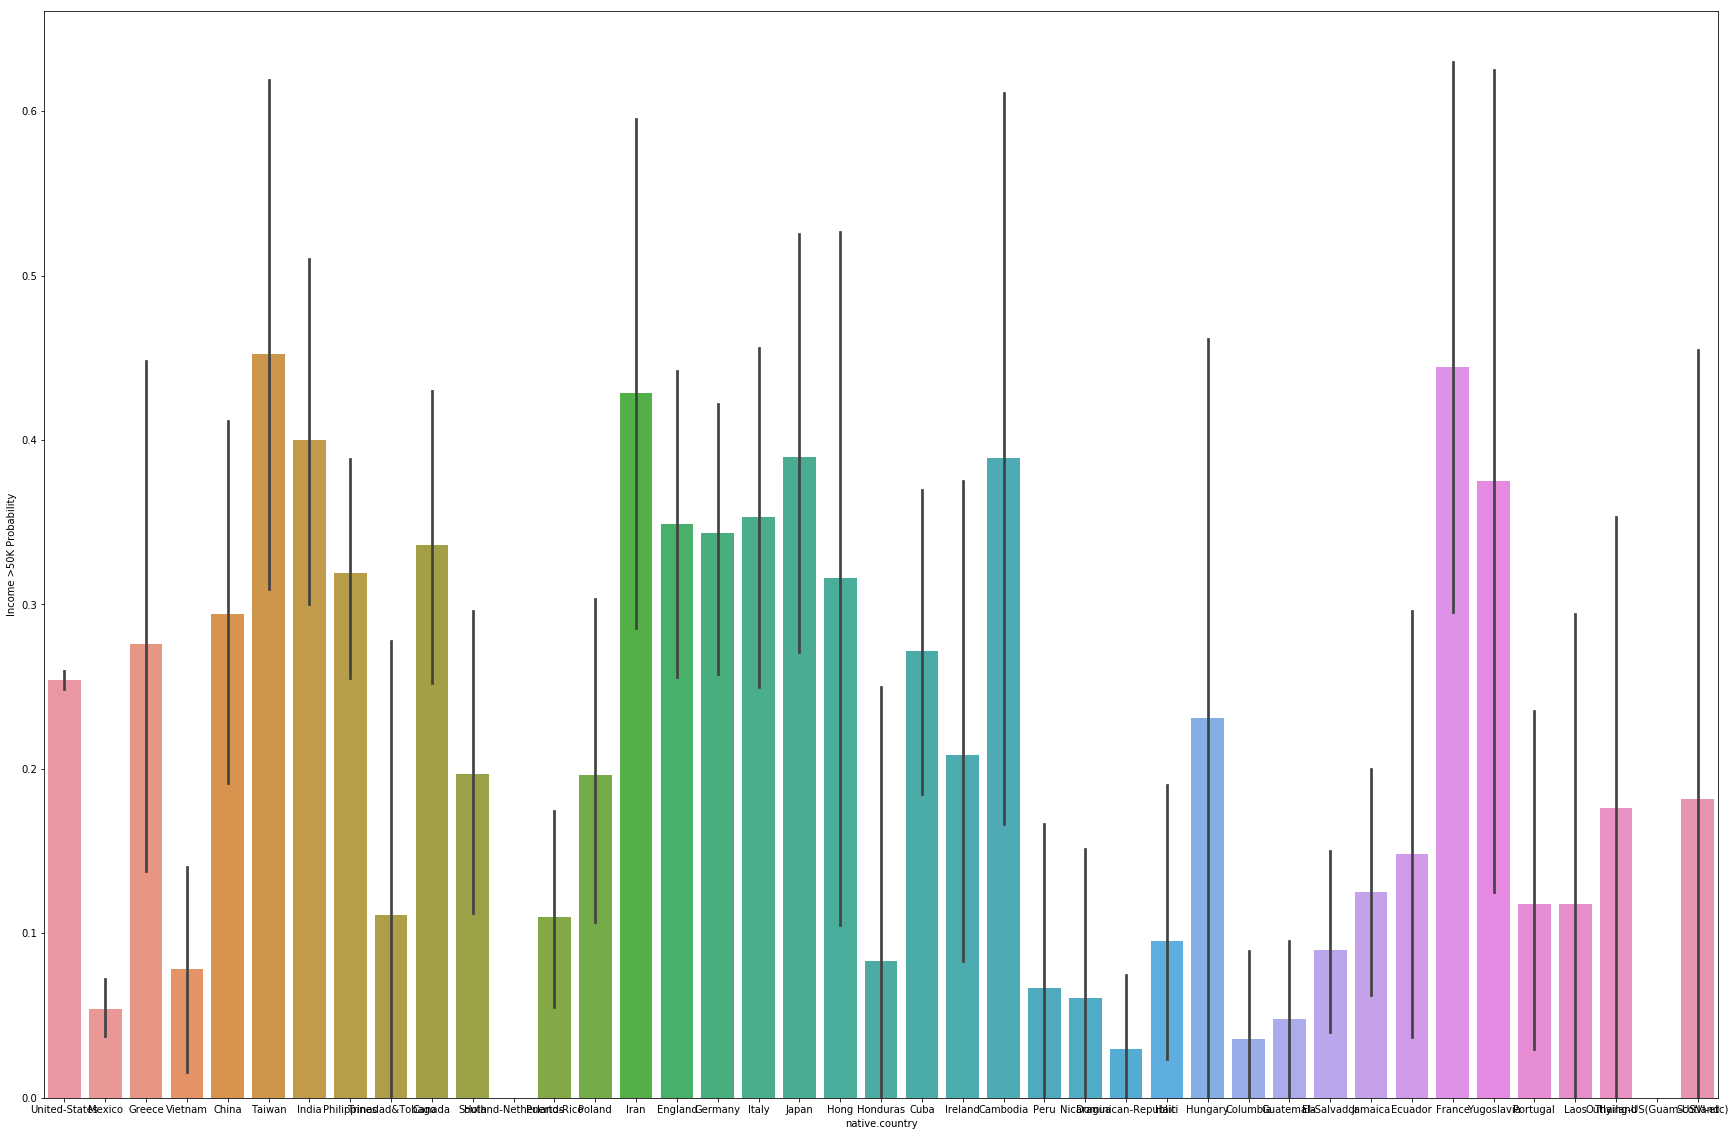

In [29]:
# Explore native nation vs income
plt.figure(figsize=(30,20))
g = sns.barplot(x="native.country",y="income",data=data)
g = g.set_ylabel("Income >50K Probability")
plt.show()

## 5) Modeling

In [30]:
# Import library
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [31]:
# Check the categorical data
categorical_data = data.select_dtypes(include=['object'])
categorical_data.columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

In [32]:
# encode categorical variables numerically for classification
categorical_data = categorical_data.apply(enc.fit_transform)
categorical_data.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
1,2,11,1,3,1,4,0,38
3,2,5,1,6,4,4,0,38
4,2,15,1,9,3,4,0,38
5,2,11,1,7,4,4,0,38
6,2,0,1,0,4,4,1,38


In [33]:
# Merge the dataset
data = data.drop(categorical_data.columns, axis=1)
data = pd.concat([data, categorical_data], axis=1)
data.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass,education,marital.status,occupation,relationship,race,sex,native.country
1,82,132870,9,0,4356,18,0,2,11,1,3,1,4,0,38
3,54,140359,4,0,3900,40,0,2,5,1,6,4,4,0,38
4,41,264663,10,0,3900,40,0,2,15,1,9,3,4,0,38
5,34,216864,9,0,3770,45,0,2,11,1,7,4,4,0,38
6,38,150601,6,0,3770,40,0,2,0,1,0,4,4,1,38


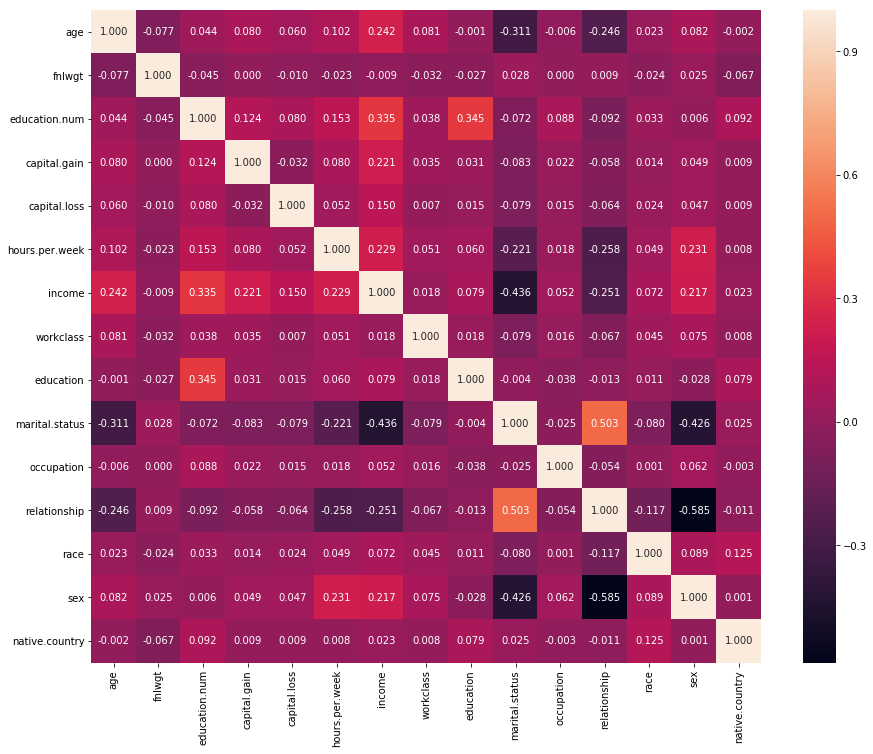

In [34]:
# Check the Variable Correlations
plt.figure(figsize=(15,12))
cor_map = data.corr()
sns.heatmap(cor_map, annot=True, fmt='.3f')

### Inference: 
    
Age, education level, working hours, gender and capital status are important factors affecting income level. 

### Build Random Forest model and Decision Tree model to predict the income class.

In [35]:
# Split the dataset into train set and test set.
from sklearn.model_selection import train_test_split

X = data.drop('income', axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [36]:
# Import library and use the train dataset to build the random Forest model.
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=24)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=24, verbose=0, warm_start=False)

In [37]:
# Compelete the prediction task using the test dataset
y_pred = clf.predict(X_test)

In [38]:
# Check the accuracy of Random Forest model
from sklearn.metrics import accuracy_score
print("Random Forests accuracy", accuracy_score(y_test, y_pred))

Random Forests accuracy 0.851917338932


In [39]:
# Import library, and use the train data to build decision tree model
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='gini', random_state=21, max_depth=10)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=21,
            splitter='best')

In [40]:
# Use decision tree model to predict the income class in the test data set
tree_pred = dtree.predict(X_test)

In [41]:
# Ccheck the accuracy of decision tree model
print("Decision Tree accuracy: ", accuracy_score(y_test, tree_pred))

Decision Tree accuracy:  0.847717979887


### Inference: 
    
The prediction accuracy scores of the Random Forest model and Decision Tree model are similar. However, Random Forest is marginally better. We can use Random Forest model in future prediction.